In [1]:
import torch
from refactor.probes import model_setup

In [2]:
model_names = ["gpt_gptsw3_en_da_356m_gbs1024","gpt_gptsw3_en_da_is_356m_gbs1024","gpt_gptsw3_en_is_da_356m_gbs1024","gpt_sw3_356m"]
lambda_val = 5
layer = "transformer.h.15.ln_1.bias"
for model_name in model_names:
    
    model_path = "downloaded_models/"

    model, tokenizer, device = model_setup(f"{model_path}{model_name}")
    
    steering = torch.load(f"steering_vectors/{model_name}/combined_steering_vector_layer_15_tensor.pt",map_location = device)
    
    model.state_dict()[layer] += steering*lambda_val
    
    model.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')
    tokenizer.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')  # Optional but recommended

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("results/data/steering_data_bible/bible_data_combined.csv")
df = df[(df.layer == 15) & (df.lambda_amount == 5)]
#temp =pd.read_csv("rresults/data/steering_data_bible/combined_english_without_steering.csv")

In [11]:
df.english_predicted_output_without_steering

0      .   Tindra: I think the point is that God is a...
1          If you think that this is the case, you're...
2       the earth was so cold and dead. the wind was ...
3       and there was a cold and a coldness over the ...
4                                                    ...
                             ...                        
563     His daughter, and one of the daughters of the...
564    . He died in 1210, and was buried at St. Nicho...
565      "Son of the Eber" is the name of a family na...
566     He was born in 1878 and was the eldest of the...
567      The last of the family was the grandson of t...
Name: english_predicted_output_without_steering, Length: 568, dtype: object

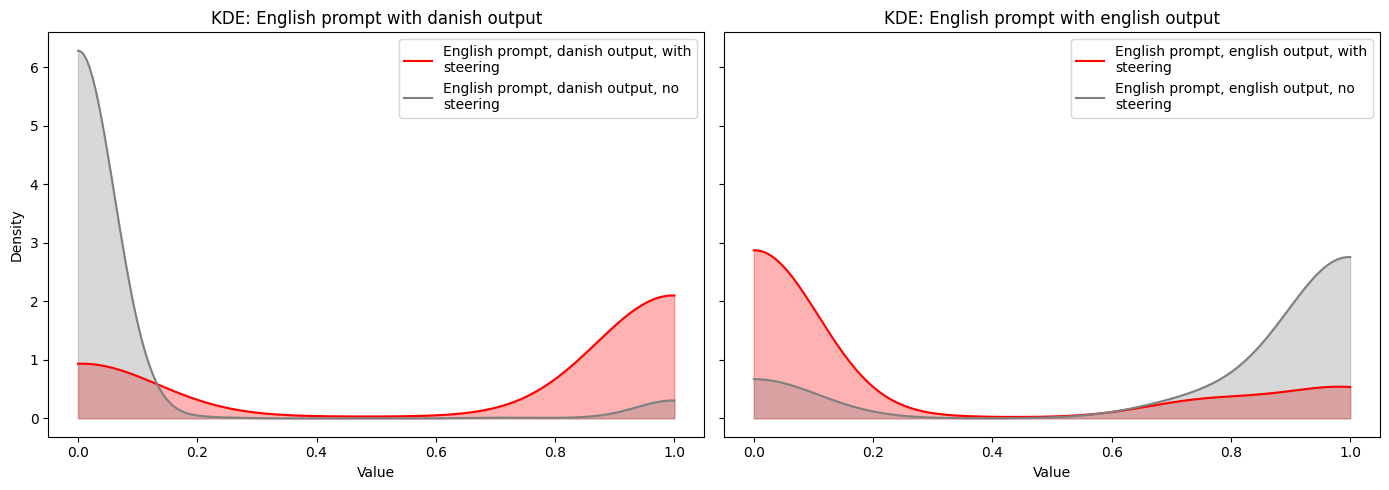

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import textwrap

# Columns for each KDE plot
kde1_cols = [
    "danish_language_prediction_on_english_steered",
    "danish_score_on_english_prompt_without_steering"
]
kde2_cols = [
    "english_prompt_score",
    "english_predicted_output_without_steering_score"
]

# Titles
titles = {
    "danish_language_prediction_on_english_steered": "English prompt, danish output, with steering",
    "danish_score_on_english_prompt_without_steering": "English prompt, danish output, no steering",

    "english_prompt_score": "English prompt, english output, with steering",
    "english_predicted_output_without_steering_score": "English prompt, english output, no steering"
}

# Color scheme using matplotlib's Set1 colormap
colors = plt.cm.Set1(range(5))
color_map = {
    "danish_language_prediction_on_english_steered": "red",
    "danish_score_on_english_prompt_without_steering": "grey",
    "english_prompt_score": "red",
    "english_predicted_output_without_steering_score": "grey",
}

#Farve 1 english_predicted_output_without_steering_score

# Create 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Function to plot KDE
def plot_kde(ax, cols):
    for col in cols:
        data = df[col].dropna()
        if len(data) == 0:
            continue  # Skip empty columns
        kde = gaussian_kde(data)
        x_vals = np.linspace(min(data), max(data), 200)
        y_vals = kde(x_vals)
        ax.plot(x_vals, y_vals, label="\n".join(textwrap.wrap(titles[col], width=40)), color=color_map[col])
        ax.fill_between(x_vals, y_vals, alpha=0.3, color=color_map[col])

# Plot 1
plot_kde(axes[0], kde1_cols)
axes[0].set_title("KDE: English prompt with danish output")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

# Plot 2
plot_kde(axes[1], kde2_cols)
axes[1].set_title("KDE: English prompt with english output")
axes[1].set_xlabel("Value")
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
df[df.danish_prompt_score < 0.6].sample(10)["danish_predicted_output"]

In [17]:
df[df.english_prompt_score < 0.6].sample(10)["english_predicted_output"]

18567      13. dansk: Dette gælder også for produkter, ...
34119    " på Dansk.  Den tredje gang sagde Gud til Ada...
14031                                                  ...
39159        For en kort tid, er det kun de to børn, so...
41799        Engelsk: "November 1984" er en serie af 12...
36999     og hver fugl på himlen, og bragt dem til mand...
11703        20. 30% af de danske børn får nemlig deres...
42687        TIL    1. Den Hellige Ånd er den eneste sa...
40479     de havde to små børn. de havde ingen penge. d...
47247    . ->  engelsk  Og da sagde Herren til Moses: S...
Name: english_predicted_output, dtype: object

In [63]:
df[df.danish_language_prediction_on_english_steered > 0.7].sample(10).english_predicted_output.iloc[0]

'    18. På den anden side er den ikke lige så god som sin forgænger. ->  On den anden side er den ikke lige så god som forgængeren.    19. Du kan ikke bruge din egen hånd til at gøre det, men med en hånd, kan du være i stand til at gøre det, som du ønsker. ->  Du kan ikke bruge din egen'